## Project Information:

 - Models: I used the YOLOv8 models as bases models, and their provided methods from the `ultralytics` library.

 - Dataset: I used the Roboflow site for handling the dataset. I uploaded my images and produced the version that I wanted to try.   

 **Dataset versions:**
 1. **Original Dataset:**
    - Train: 35 images
    - Validation: 10 images
    - Testing: 5 images

2. **Augmented Dataset:**
    - Train: 70 images (35 x 2)
    - Validation: 10 images
    - Testing: 5 images

      **Augmentation used:**
    - Crop: 0% Minimum Zoom, 45% Maximum Zoom
    - Rotation: Between -15° and +15°
    - Hue: Between -15° and +15°
    - Noise: Up to 0.85% of pixels

3. **Augmented Dataset with no-class pictures:**   
    - Train: 106 images   
    - Validation: 15 images  
    - Testing: 8 images   

    (same augmentation with the previous dataset)
    (26 new images added compared with the previous dataset that don't contain the objected we try to detect, images contain similar in shape and color objects with the one we try to detect making it difficult for the model to distinguish them).

## Project Initialization

In [1]:
import os
import cv2

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from IPython.display import display, Image


HOME = os.getcwd()
print(HOME)

Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.6.0 CPU (Apple M1 Max)
Setup complete ✅ (10 CPUs, 64.0 GB RAM, 642.6/1858.2 GB disk)
/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final


## CLI Basic Commands for YOLO

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect     mode=train     model=yolov8n.yaml      args...
          classify        predict         yolov8n-cls.yaml  args...
          segment         val             yolov8n-seg.yaml  args...
                          export          yolov8n.pt        format=onnx  args...
```

## Inference Example with the Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [7]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' project="runs" save=True

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.6.0 CPU (Apple M1 Max)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 36.7ms
Speed: 1.3ms preprocess, 36.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final


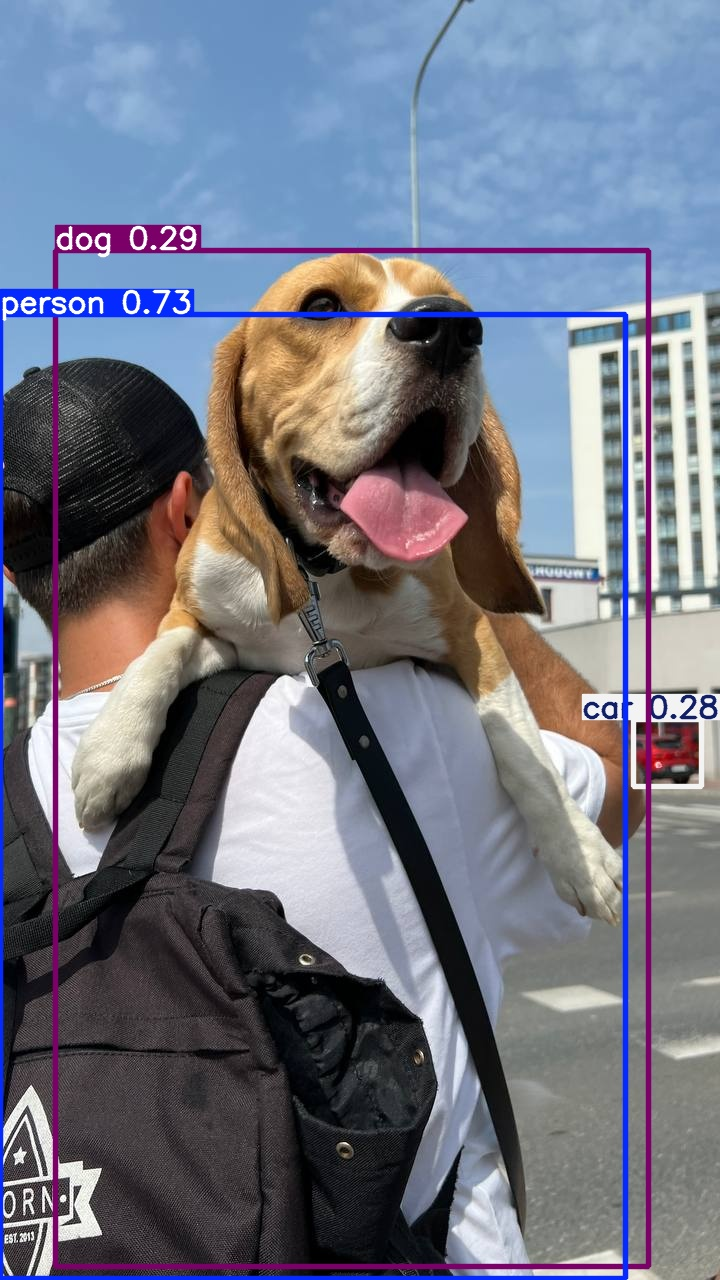

In [8]:
%cd {HOME}
Image(filename='runs/predict4/dog.jpg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [9]:
model = YOLO(f'yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 46.0ms
Speed: 1.2ms preprocess, 46.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


In [10]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4716,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]])

In [11]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846])

In [12]:
results[0].boxes.cls

tensor([ 0., 16.,  2.])

## Train a model on the Original ( NO Augmented Dataset)

### Download the Original Custom dataset (NO augmentation)

Example of training Images:

<img src="utils/bs_no_augemented_image1.jpg" alt="Alt text" width="250">
<img src="utils/bs_no_augemented_image2.jpg" alt="Alt text" width="250">
<img src="utils/bs_no_augemented_image3.jpg" alt="Alt text" width="250">

In [ ]:
'''
This scipt:
1) Creates the dataset directory
2) Downloads a dataset from Roboflow
3) Assigns the dataset to a variable
'''

!mkdir -p datasets
%cd datasets

from roboflow import Roboflow

roboflow.login()

rf = Roboflow(api_key="RHPSWhJXTuE0giOPOuV0")
project = rf.workspace("cvfinal-ifkxw").project("banana-slug")
version = project.version(1)
dataset = version.download("yolov8")

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets


NameError: name 'roboflow' is not defined

### Training

The next cli command `finetunes` a yolo model  on the data defined in the `dataset` variable that has been used in the previous step when it download it from Roboflow.

The model is saved in the `$HOME/$project/$name` folder, for future use.

Hyperparams:
- epochs: 25
- img size: 640x640
- default values for the rest as described [here](https://docs.ultralytics.com/modes/train/#why-choose-ultralytics-yolo-for-training)

In [19]:
%cd {HOME}
%pwd

project_name = "yolov8s-bs-normal"

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True project="models/{project_name}" name="train"

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
New https://pypi.org/project/ultralytics/8.3.89 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.6.0 CPU (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=models/yolov8s-bs-normal, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fa

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final


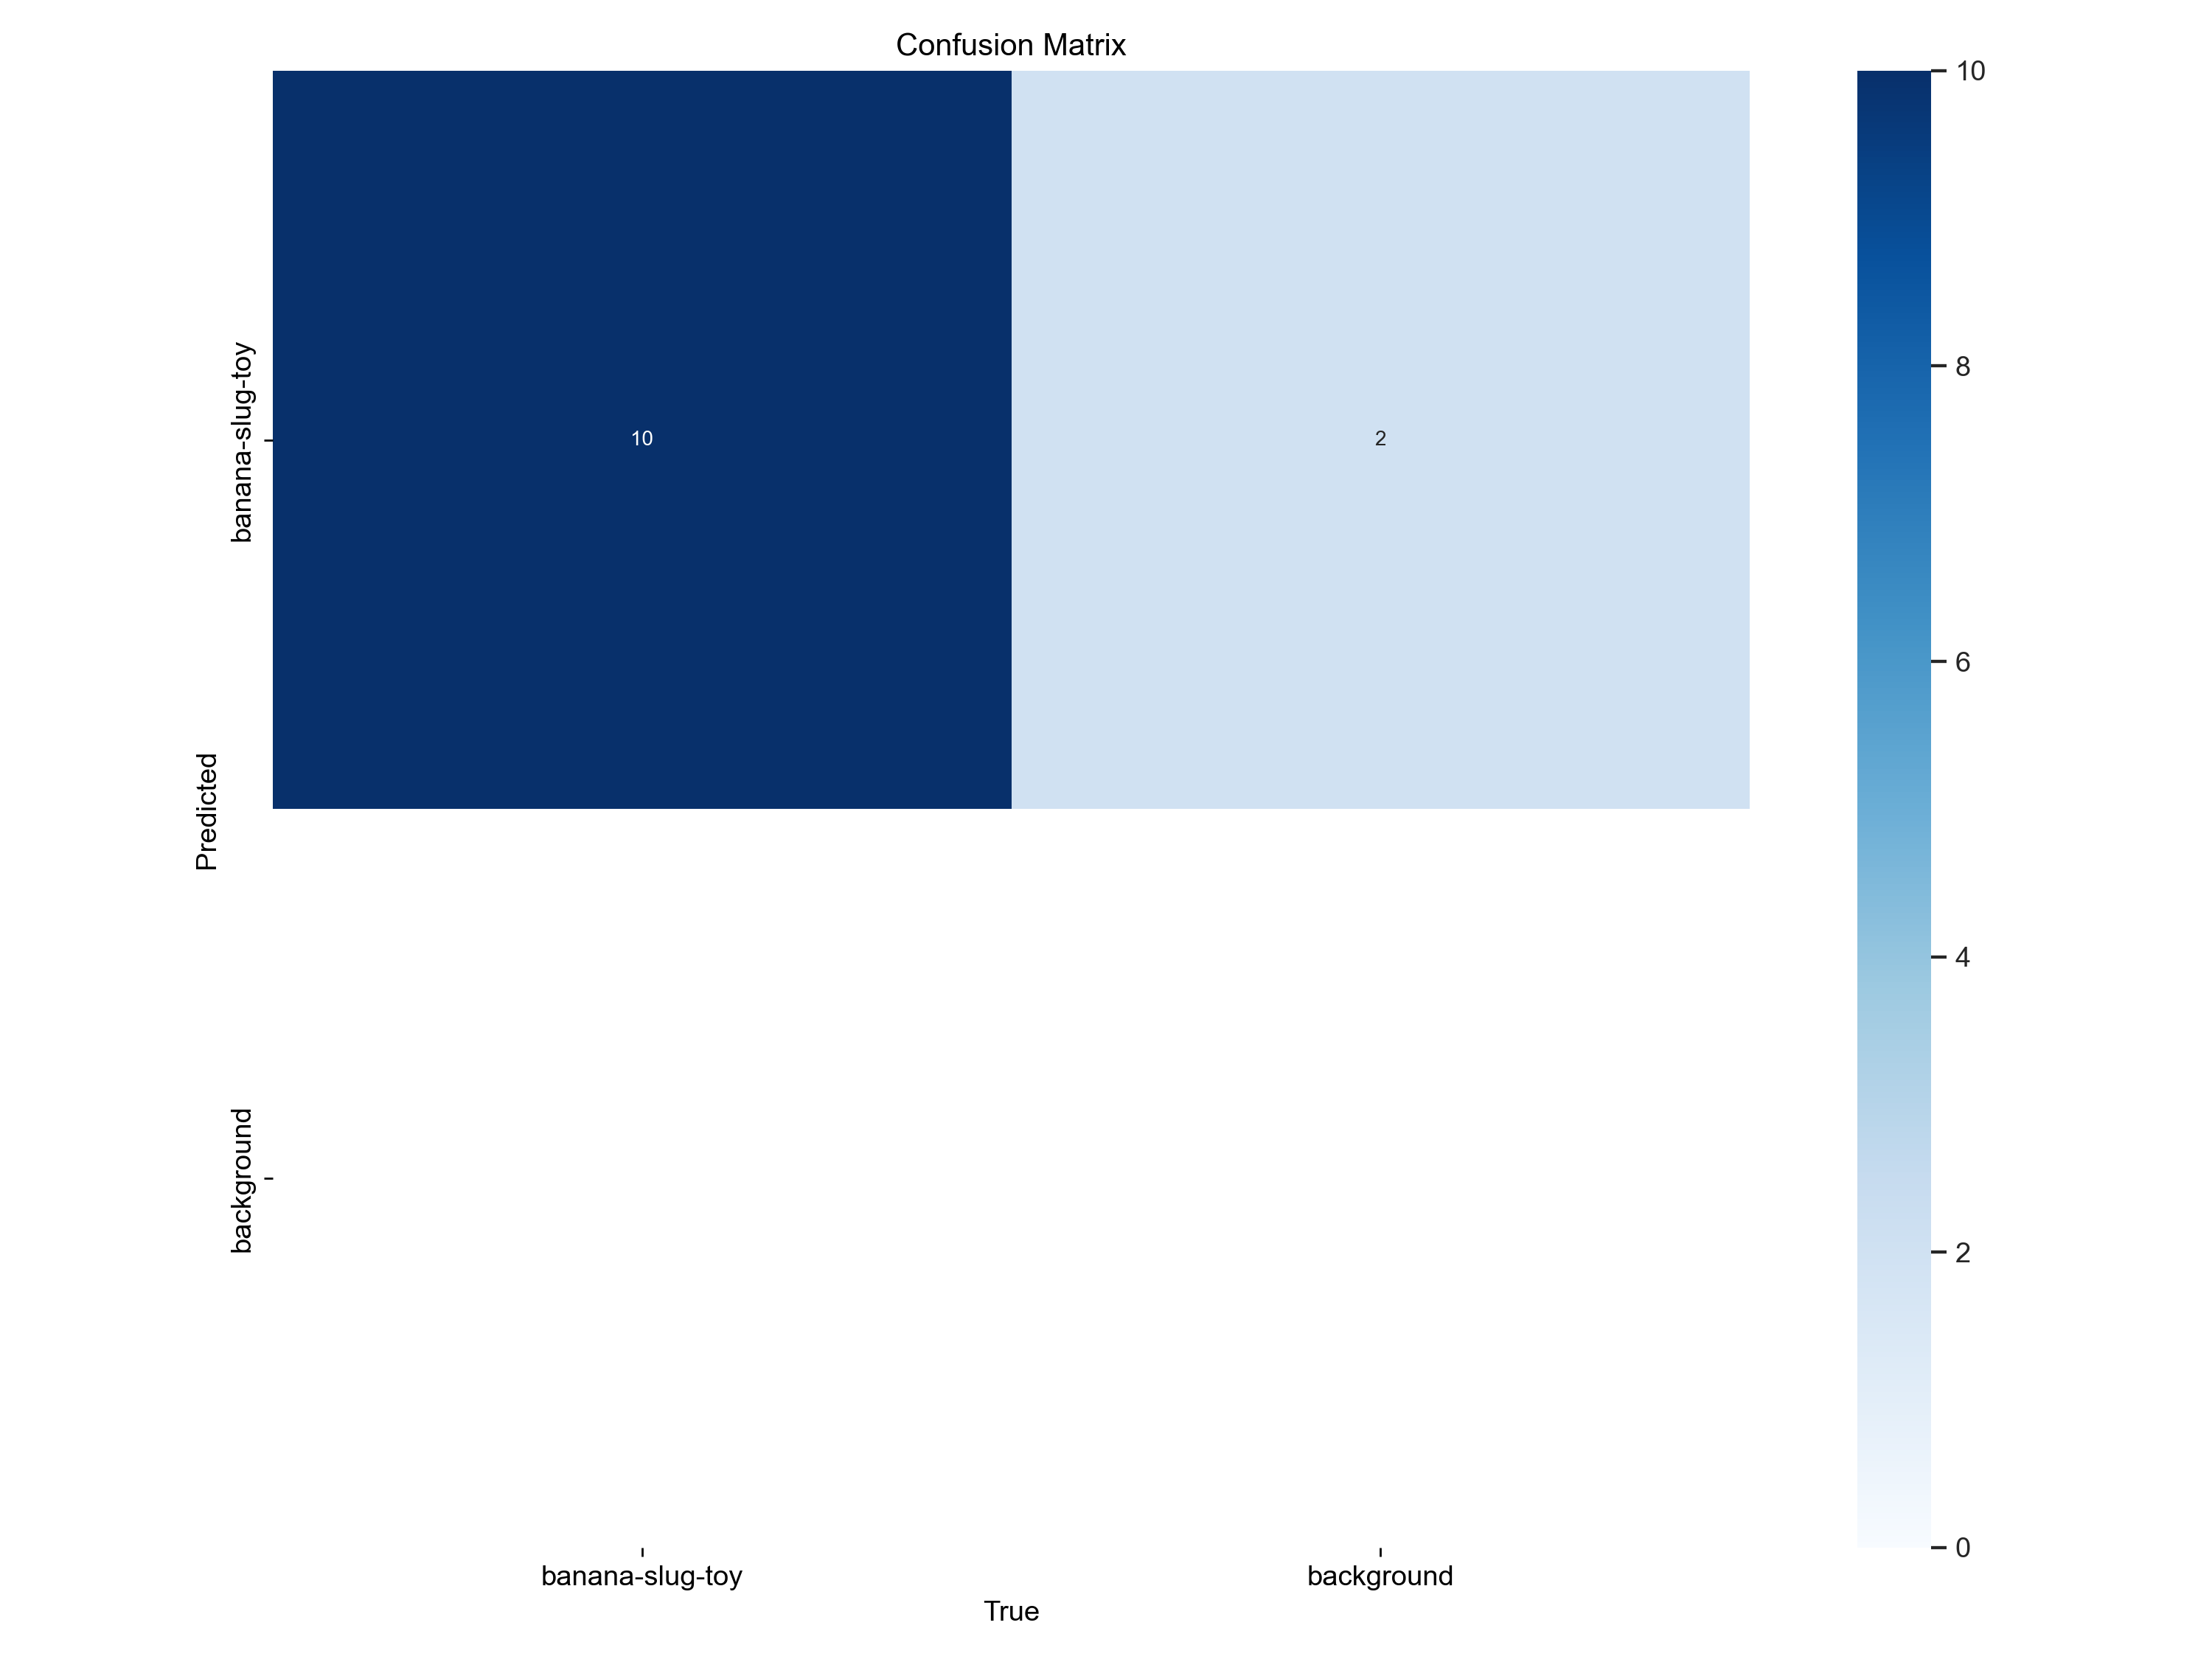

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/models/{project_name}/train/confusion_matrix.png', width=600)

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final


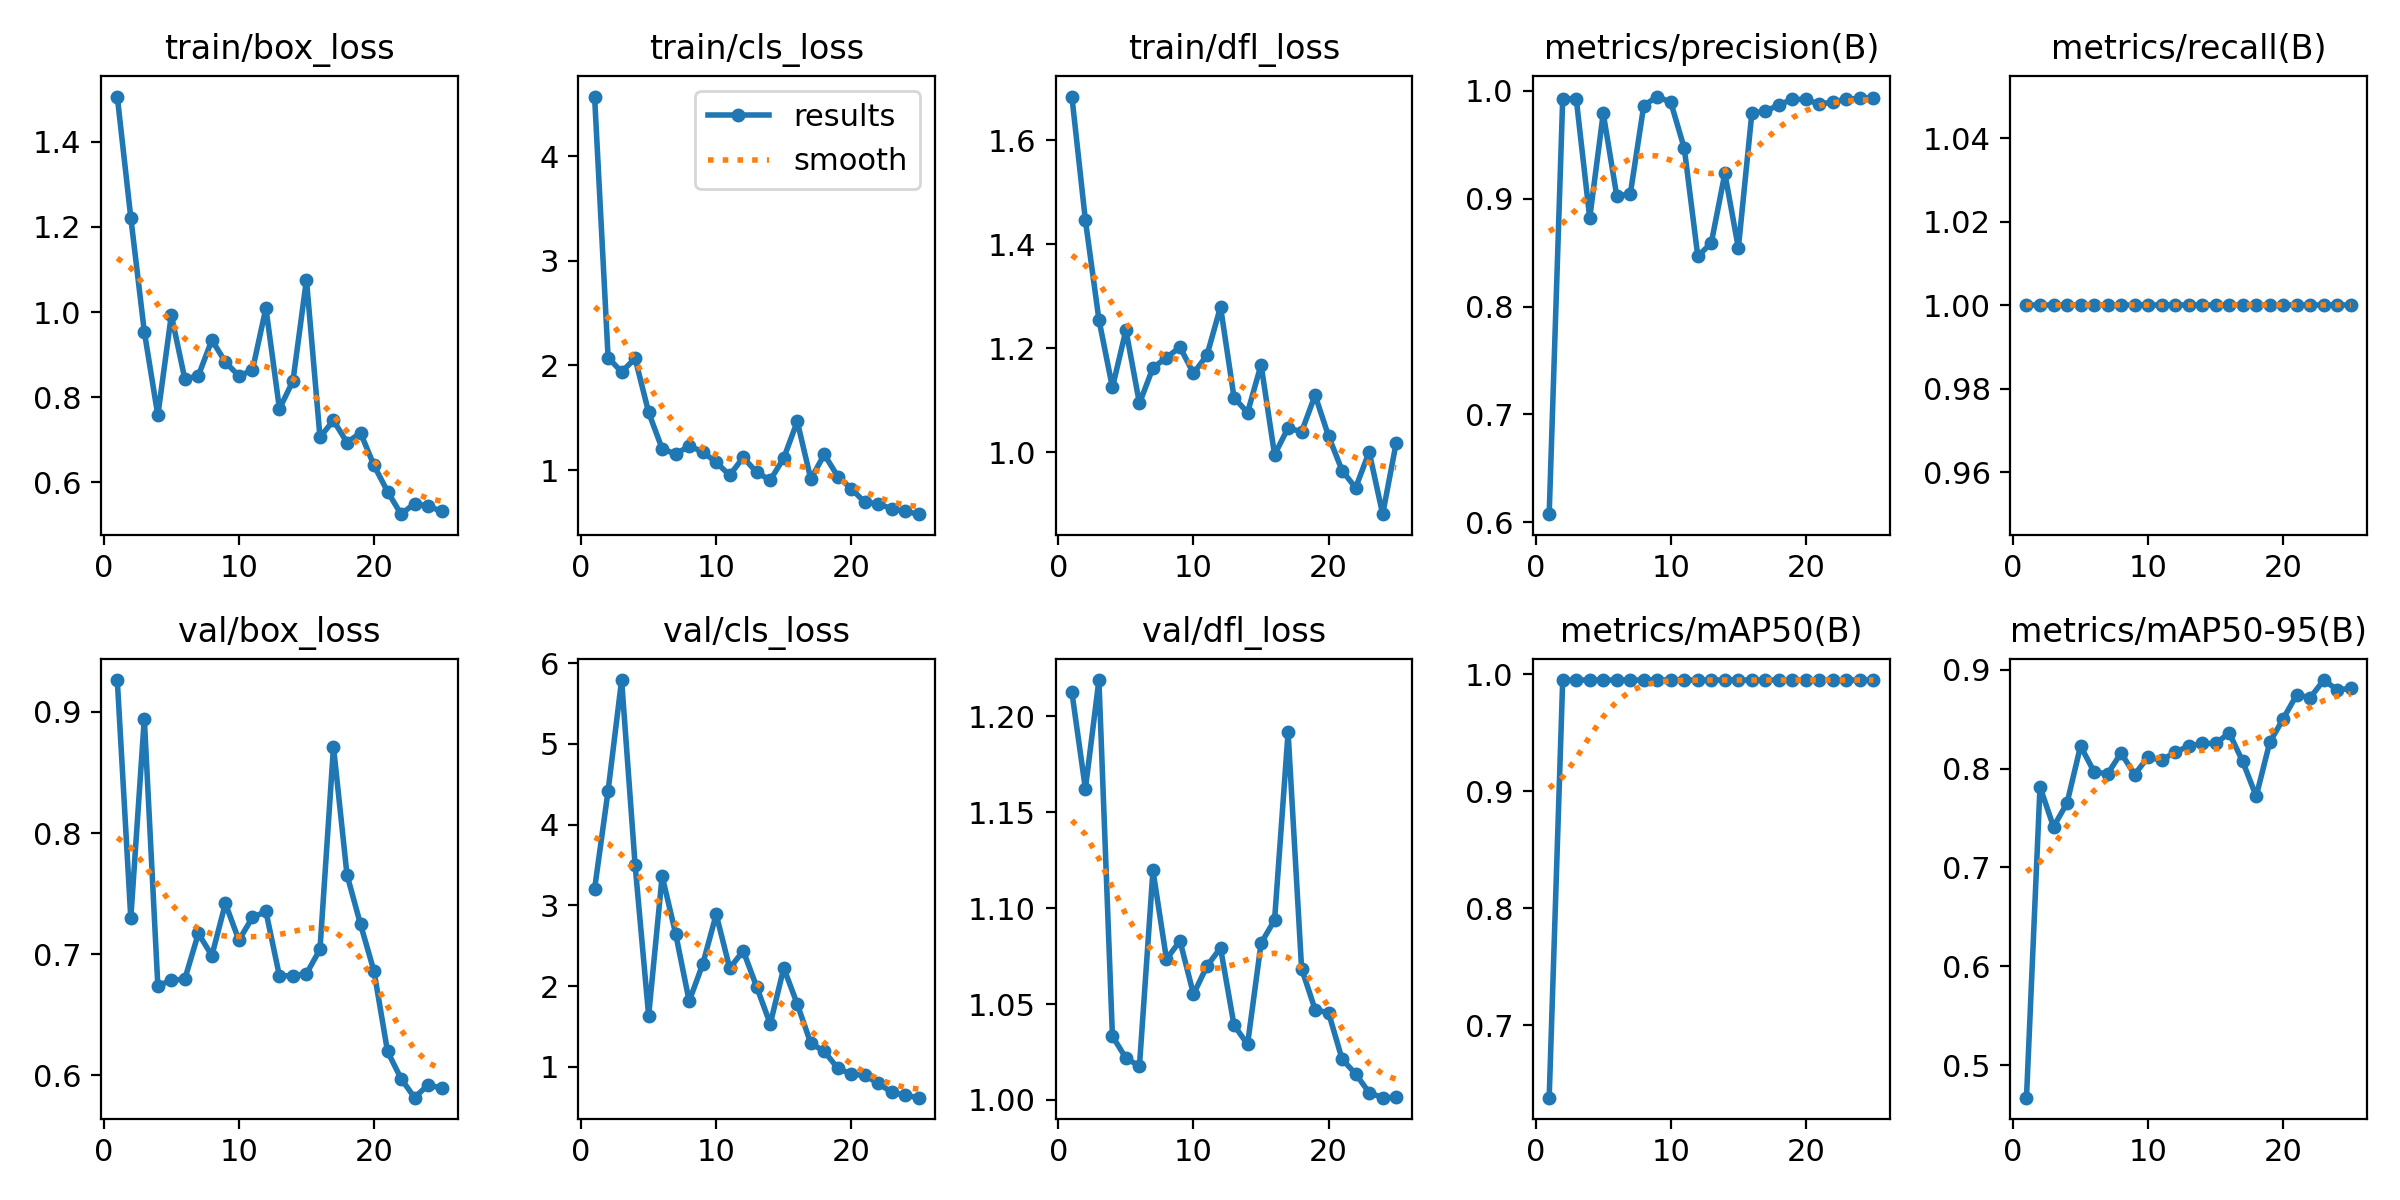

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/models/{project_name}/train/results.png', width=600)

### Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=models/{project_name}/train/weights/best.pt data={dataset.location}/data.yaml project="models/{project_name}" name="val" save=True

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.6.0 CPU (Apple M1 Max)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
Fontconfig warning: ignoring UTF-8: not a valid region tag
val: Scanning /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         10         10      0.992          1      0.995       0.89
Speed: 1.2ms preprocess, 95.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to models/yolov8s-bs-normal/val
💡 Learn more at https://docs.ultralytics.com/modes/val


#### F1-score / Precision / Recall / Precision-Recall 

<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/val/F1_curve.png" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/val/P_curve.png" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/val/R_curve.png" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/val/PR_curve.png" alt="Alt text" width="500">

Validation Labels/Preciction

<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/val/val_batch0_labels.jpg" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/val/val_batch0_pred.jpg" alt="Alt text" width="500">

ROC - Curve


image 1/10 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/valid/images/viber_image_2025-03-12_20-58-44-713_jpg.rf.8282fbfc89a1ce459fd6764ea8eb82ee.jpg: 640x640 1 banana-slug-toy, 78.9ms
image 2/10 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/valid/images/viber_image_2025-03-12_20-58-44-799_jpg.rf.0a7c14db84ce7aea9f445da020af7b9d.jpg: 640x640 1 banana-slug-toy, 79.0ms
image 3/10 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/valid/images/viber_image_2025-03-12_20-58-44-866_jpg.rf.8fb16c4d922aa742af8f30fea25c8a23.jpg: 640x640 1 banana-slug-toy, 68.6ms
image 4/10 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/valid/images/viber_image_2025-03-12_20-58-44-885_jpg.rf.a1bf2ecf372e29c5b5cb349cd02d0376.jpg: 640x640 1 banana-slug-toy, 65.9ms
image 5/10 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/valid/images/viber_image_20

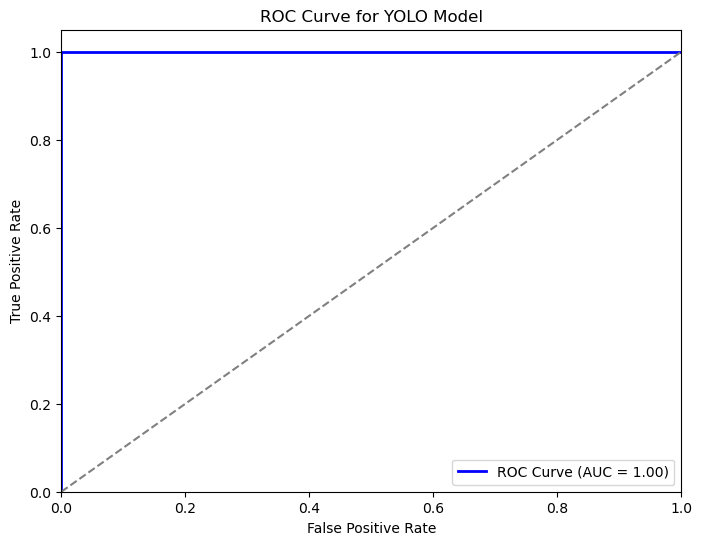

In [7]:
# Function to compute IoU
def compute_iou(box1, box2):
    """Compute IoU between two bounding boxes (x1, y1, x2, y2 format)."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area_box2 = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union = area_box1 + area_box2 - intersection
    return intersection / union if union > 0 else 0

# Load trained YOLO model
model = YOLO("/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/train/weights/best.pt")  # Change to your model file

# Paths to validation data
val_images = "/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/valid/images"  # Update with actual path
val_labels = "/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/valid/labels/"  # YOLO format label files

# Run inference
results = model(val_images)

# IoU threshold for True Positives
IOU_THRESHOLD = 0.5

# Lists to store confidence scores and ground truth labels
confidences = []
ground_truths = []

# Process predictions
for result in results:
    pred_boxes = result.boxes.xyxy.cpu().numpy()  # Predicted bounding boxes
    pred_scores = result.boxes.conf.cpu().numpy()  # Confidence scores
    pred_classes = result.boxes.cls.cpu().numpy()  # Predicted classes

    # Load corresponding ground truth
    image_name = result.path.split("/")[-1].replace(".jpg", ".txt")  # Adjust format if needed
    gt_file = val_labels + image_name

    try:
        gt_boxes = np.loadtxt(gt_file, usecols=[1, 2, 3, 4])  # Load bounding boxes
        if gt_boxes.ndim == 1:
            gt_boxes = np.expand_dims(gt_boxes, axis=0)

        print(f"Loaded {len(gt_boxes)} ground truth boxes from {gt_file}")

    except Exception as e:
        print(f"Error loading ground truth file {gt_file}: {e}")
        gt_boxes = np.array([])

    # Convert YOLO format (x_center, y_center, w, h) → (x1, y1, x2, y2)
    def yolo_to_xyxy(box, img_w, img_h):
        x_center, y_center, width, height = box
        x1 = (x_center - width / 2) * img_w
        y1 = (y_center - height / 2) * img_h
        x2 = (x_center + width / 2) * img_w
        y2 = (y_center + height / 2) * img_h
        return [x1, y1, x2, y2]

    img_w, img_h = result.orig_shape  # Get original image shape

    if gt_boxes.size > 0:
        gt_boxes = np.array([yolo_to_xyxy(box, img_w, img_h) for box in gt_boxes])

    # Match predictions with ground truth using IoU
    for i, score in enumerate(pred_scores):
        max_iou = 0  # Track highest IoU for this prediction
        for gt_box in gt_boxes:
            iou = compute_iou(pred_boxes[i], gt_box)
            max_iou = max(max_iou, iou)

        # If IoU ≥ threshold, it's a TP; otherwise, it's a FP
        confidences.append(score)
        ground_truths.append(1 if max_iou >= IOU_THRESHOLD else 0)

# Compute ROC curve
fpr, tpr, _ = roc_curve(ground_truths, confidences)
roc_auc = auc(fpr, tpr)

print("Total Positive Cases (Ground Truth 1s):", sum(ground_truths))
print("Total Negative Cases (Ground Truth 0s):", len(ground_truths) - sum(ground_truths))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for YOLO Model")
plt.legend(loc="lower right")
plt.show()


### Inference (Testing)

In [24]:
%cd {HOME}
!yolo task=detect mode=predict model=models/{project_name}/train/weights/best.pt conf=0.25 source={dataset.location}/test/images project="models/{project_name}" name="test" save=True

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.6.0 CPU (Apple M1 Max)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/5 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/test/images/viber_image_2025-03-12_20-58-44-988_jpg.rf.06fd2c12aad6a4a14087a73c3f1cf1de.jpg: 640x640 1 banana-slug-toy, 84.9ms
image 2/5 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/test/images/viber_image_2025-03-12_20-58-45-005_jpg.rf.0822ea2e22bc11e85ec140647271c163.jpg: 640x640 1 banana-slug-toy, 74.0ms
image 3/5 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/test/images/viber_image_2025-03-12_20-58-45-247_jpg.rf.19a4e8d1d94c5e46e48322623203f817.jpg: 640x640 2 banana-slug-toys, 80.9ms
image 4/5 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-1/test/images/viber_image_2025-03-12_20-58-45-29

#### Training Infererence Examples

<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/test/viber_image_2025-03-12_20-58-44-988_jpg.rf.06fd2c12aad6a4a14087a73c3f1cf1de.jpg" alt="Alt text" width="300">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/test/viber_image_2025-03-12_20-58-45-005_jpg.rf.0822ea2e22bc11e85ec140647271c163.jpg" alt="Alt text" width="300">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/test/viber_image_2025-03-12_20-58-45-247_jpg.rf.19a4e8d1d94c5e46e48322623203f817.jpg" alt="Alt text" width="300">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/test/viber_image_2025-03-12_20-58-45-296_jpg.rf.0bf8d7e8015c760eabde137258a81bcf.jpg" alt="Alt text" width="300">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-normal/test/viber_image_2025-03-12_20-58-45-462_jpg.rf.628caa91e37dcde160fe1da49e40666c.jpg" alt="Alt text" width="300">

## Train a model on the Augmented Dataset

As augmentation I applied:
- Croping
- Rotation
- Hue
- Noise

Three (3) Outputs per original Image!

Example of Augmented Images:

<img src="utils/bs_augemented_image1.jpg" alt="Alt text" width="250">
<img src="utils/bs_augemented_image2.jpg" alt="Alt text" width="250">
<img src="utils/bs_augemented_image3.jpg" alt="Alt text" width="250">

### Download the Augmented dataset

In [30]:
!mkdir -p datasets
%cd {HOME}
%cd datasets

from roboflow import Roboflow
import roboflow

roboflow.login()

rf = Roboflow(api_key="RHPSWhJXTuE0giOPOuV0")
project = rf.workspace("cvfinal-ifkxw").project("banana-slug")
version = project.version(2)
augmented_dataset = version.download("yolov8")

project_name = "yolov8s-bs-augmented"

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets
You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


### Training

Hyperparams:
- epochs: 10
- imgsz: 640x640
- single_cls=True
- default values for rest as described [here](https://docs.ultralytics.com/modes/train/#why-choose-ultralytics-yolo-for-training)

In [31]:
%cd {HOME}
%pwd
!yolo task=detect mode=train model=yolov8s.pt data={augmented_dataset.location}/data.yaml epochs=10 imgsz=640 single_cls=True plots=True project="models/{project_name}" name="train"

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
New https://pypi.org/project/ultralytics/8.3.89 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.6.0 CPU (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=models/yolov8s-bs-augmented, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final


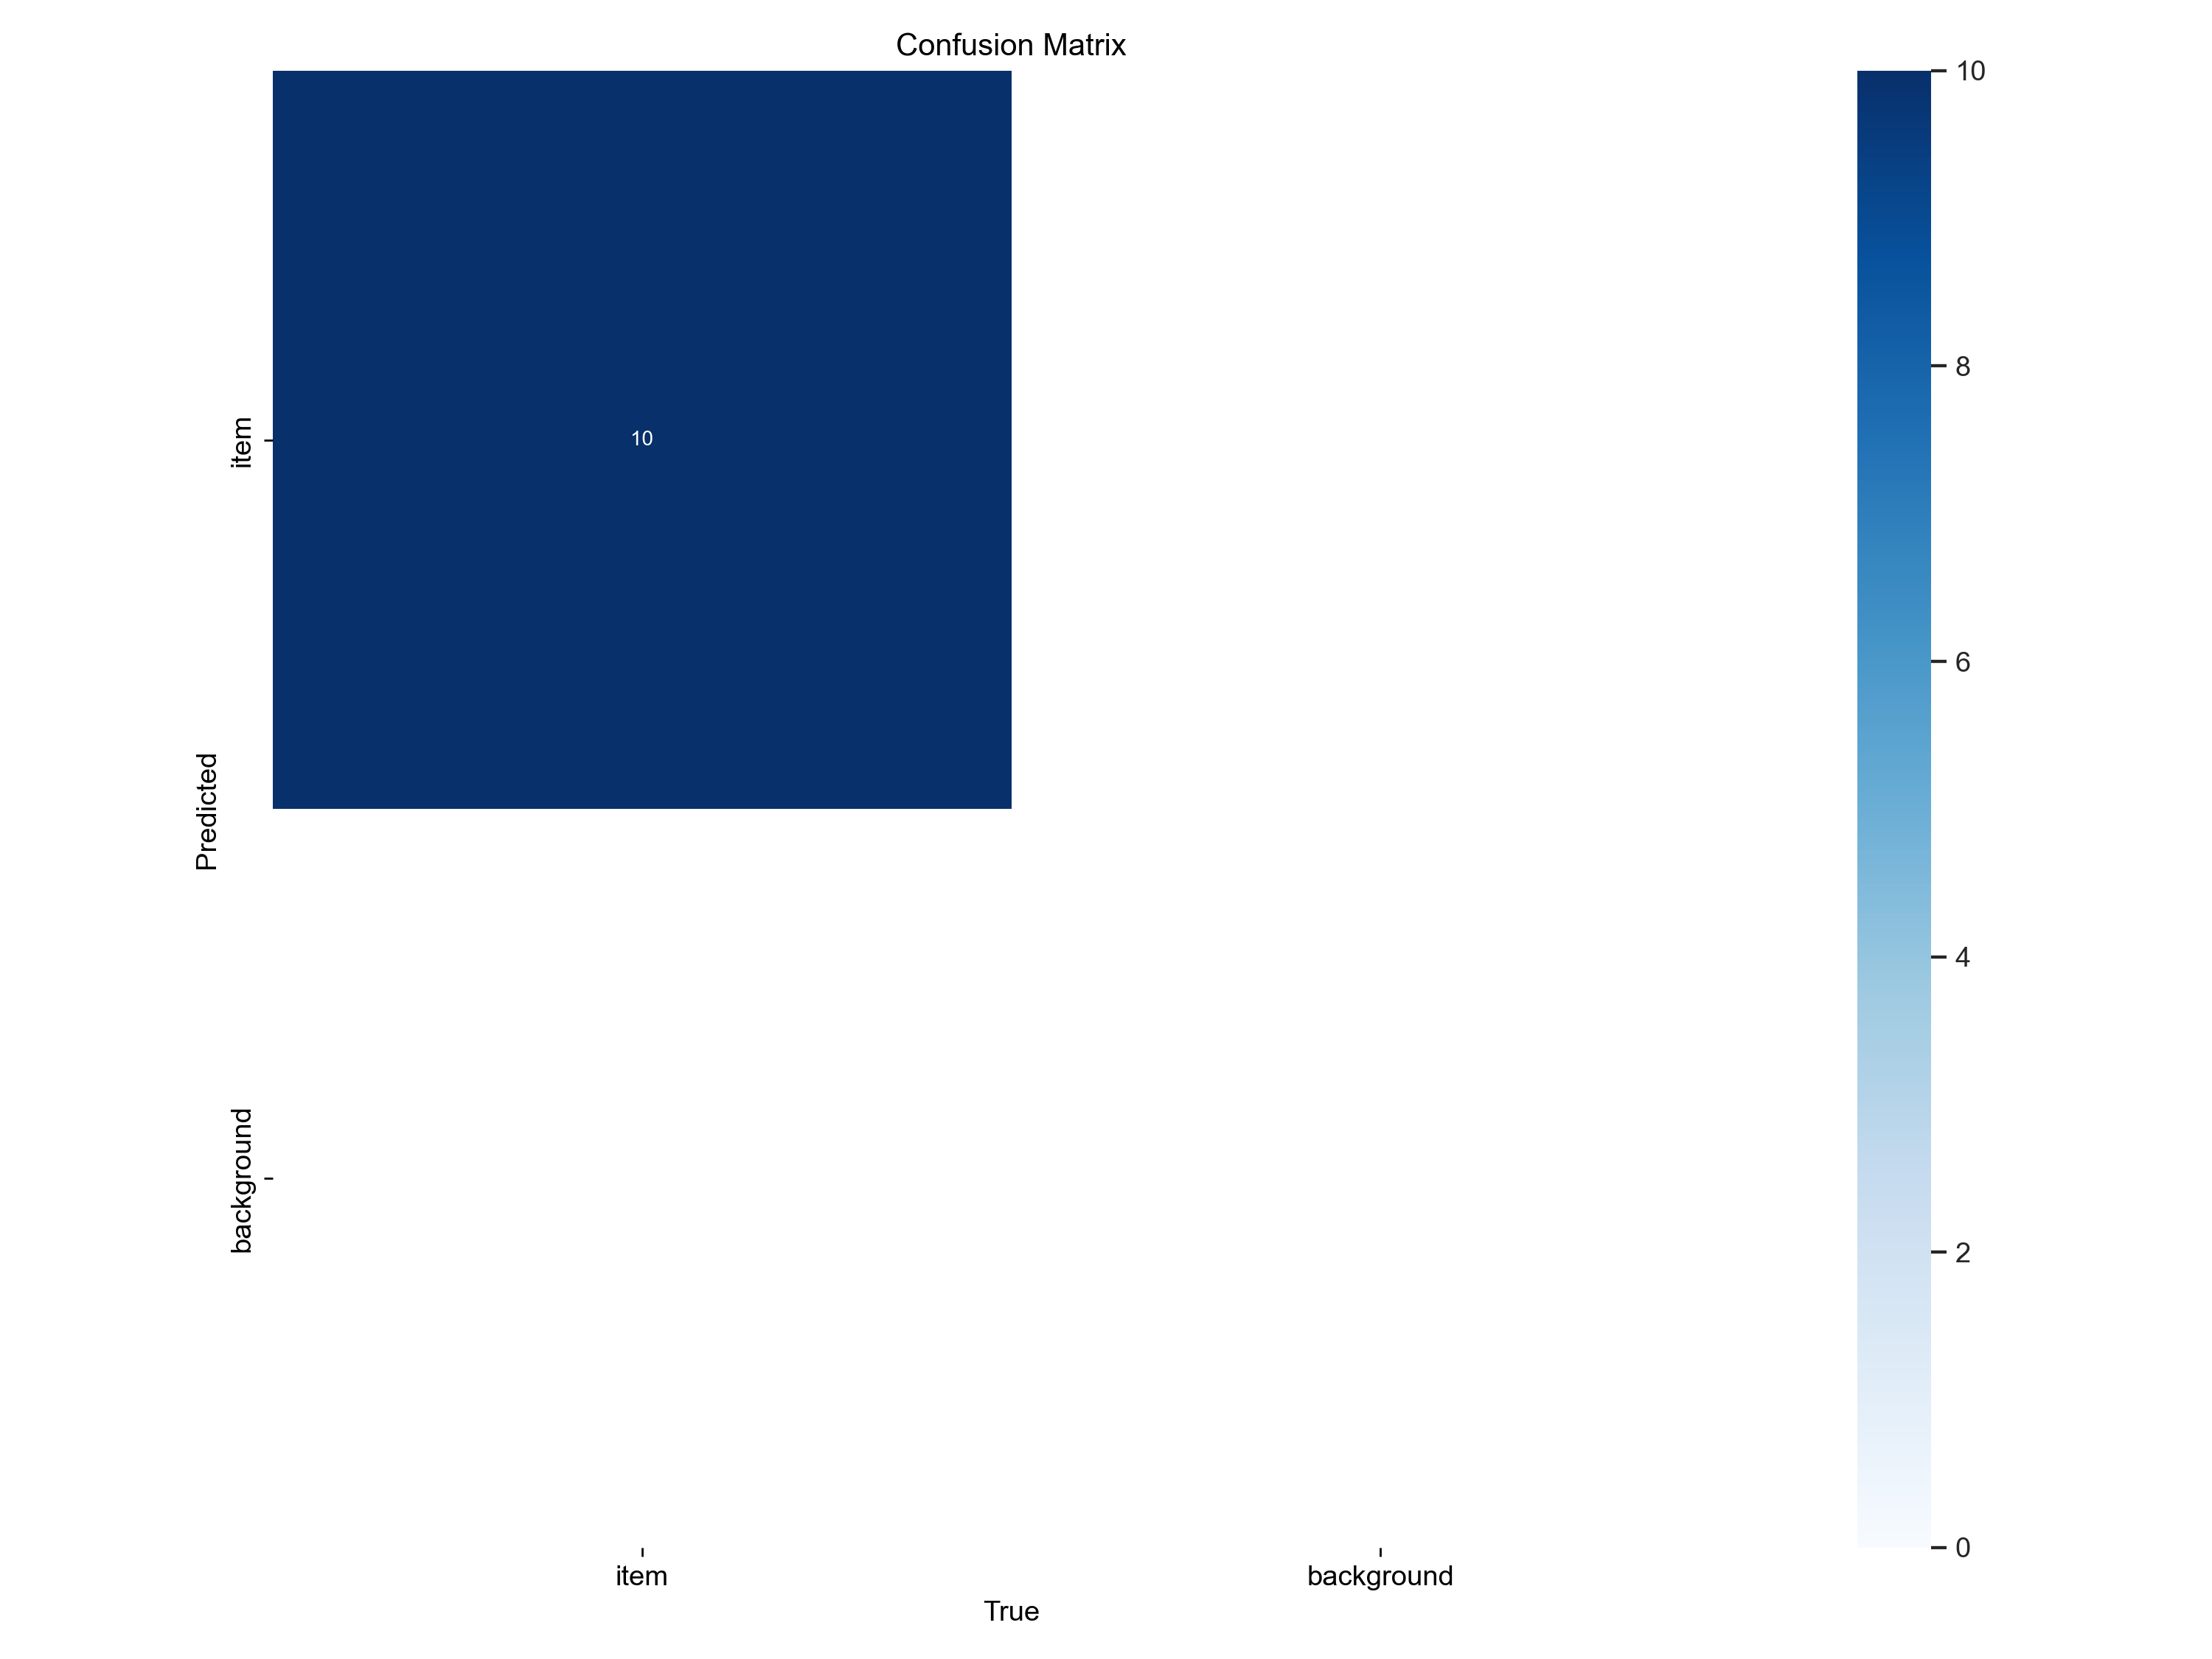

In [34]:
%cd {HOME}
Image(filename=f'models/{project_name}/train/confusion_matrix.png', width=600)

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final


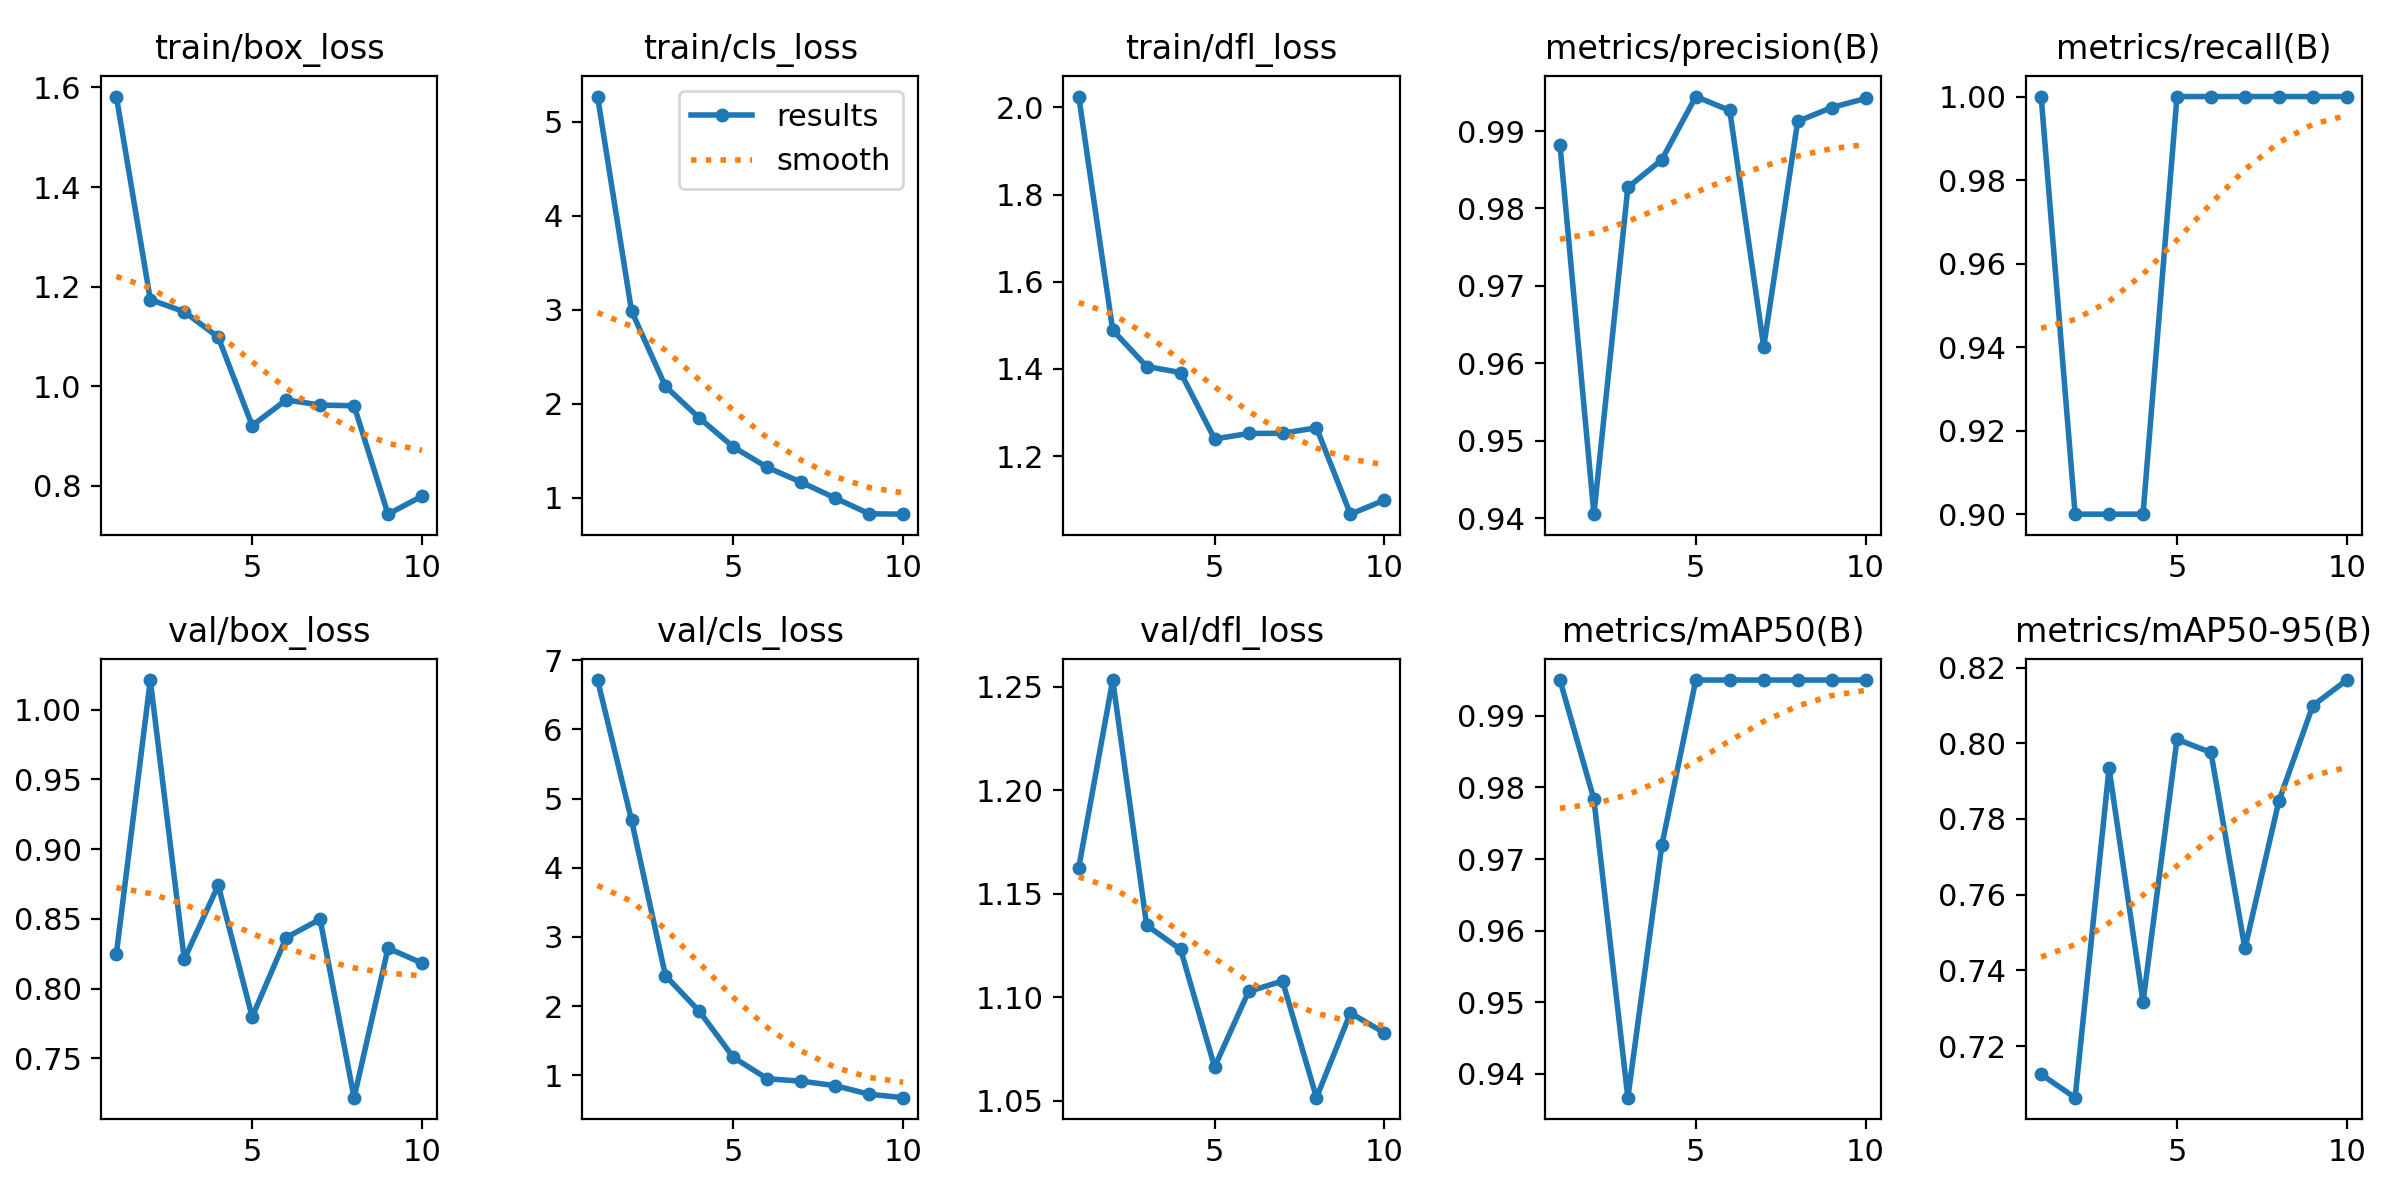

In [35]:
%cd {HOME}
Image(filename=f'models/{project_name}/train/results.png', width=600)

### Validate Model

In [37]:
%cd {HOME}

!yolo task=detect mode=val model=models/{project_name}/train/weights/best.pt data={augmented_dataset.location}/data.yaml project="models/{project_name}" name="val"

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.6.0 CPU (Apple M1 Max)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
Fontconfig warning: ignoring UTF-8: not a valid region tag
val: Scanning /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         10         10      0.994          1      0.995      0.817
Speed: 1.2ms preprocess, 89.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to models/yolov8s-bs-augmented/val
💡 Learn more at https://docs.ultralytics.com/modes/val


<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/val/F1_curve.png" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/val/P_curve.png" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/val/R_curve.png" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/val/PR_curve.png" alt="Alt text" width="500">

Validation Labels/Predictions

<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/val/val_batch0_labels.jpg" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/val/val_batch0_pred.jpg" alt="Alt text" width="500">

ROC - Curve


image 1/10 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/valid/images/viber_image_2025-03-12_20-58-44-713_jpg.rf.8282fbfc89a1ce459fd6764ea8eb82ee.jpg: 640x640 1 item, 74.4ms
image 2/10 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/valid/images/viber_image_2025-03-12_20-58-44-799_jpg.rf.0a7c14db84ce7aea9f445da020af7b9d.jpg: 640x640 1 item, 72.4ms
image 3/10 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/valid/images/viber_image_2025-03-12_20-58-44-866_jpg.rf.8fb16c4d922aa742af8f30fea25c8a23.jpg: 640x640 1 item, 68.7ms
image 4/10 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/valid/images/viber_image_2025-03-12_20-58-44-885_jpg.rf.a1bf2ecf372e29c5b5cb349cd02d0376.jpg: 640x640 1 item, 64.6ms
image 5/10 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/valid/images/viber_image_2025-03-12_20-58-45-037_jpg.rf.43548f8811cd99c

/opt/anaconda3/envs/ultralytics-env/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


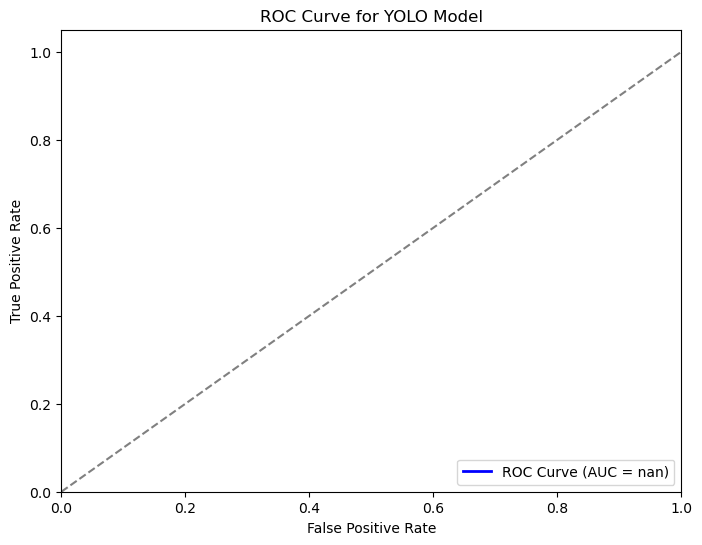

In [8]:
# Function to compute IoU
def compute_iou(box1, box2):
    """Compute IoU between two bounding boxes (x1, y1, x2, y2 format)."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area_box2 = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union = area_box1 + area_box2 - intersection
    return intersection / union if union > 0 else 0

# Load trained YOLO model
model = YOLO("/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/train/weights/best.pt")  # Change to your model file

# Paths to validation data
val_images = "/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/valid/images"  # Update with actual path
val_labels = "/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/valid/labels/"  # YOLO format label files

# Run inference
results = model(val_images)

# IoU threshold for True Positives
IOU_THRESHOLD = 0.5

# Lists to store confidence scores and ground truth labels
confidences = []
ground_truths = []

# Process predictions
for result in results:
    pred_boxes = result.boxes.xyxy.cpu().numpy()  # Predicted bounding boxes
    pred_scores = result.boxes.conf.cpu().numpy()  # Confidence scores
    pred_classes = result.boxes.cls.cpu().numpy()  # Predicted classes

    # Load corresponding ground truth
    image_name = result.path.split("/")[-1].replace(".jpg", ".txt")  # Adjust format if needed
    gt_file = val_labels + image_name

    try:
        gt_boxes = np.loadtxt(gt_file, usecols=[1, 2, 3, 4])  # Load bounding boxes
        if gt_boxes.ndim == 1:
            gt_boxes = np.expand_dims(gt_boxes, axis=0)

        print(f"Loaded {len(gt_boxes)} ground truth boxes from {gt_file}")

    except Exception as e:
        print(f"Error loading ground truth file {gt_file}: {e}")
        gt_boxes = np.array([])

    # Convert YOLO format (x_center, y_center, w, h) → (x1, y1, x2, y2)
    def yolo_to_xyxy(box, img_w, img_h):
        x_center, y_center, width, height = box
        x1 = (x_center - width / 2) * img_w
        y1 = (y_center - height / 2) * img_h
        x2 = (x_center + width / 2) * img_w
        y2 = (y_center + height / 2) * img_h
        return [x1, y1, x2, y2]

    img_w, img_h = result.orig_shape  # Get original image shape

    if gt_boxes.size > 0:
        gt_boxes = np.array([yolo_to_xyxy(box, img_w, img_h) for box in gt_boxes])

    # Match predictions with ground truth using IoU
    for i, score in enumerate(pred_scores):
        max_iou = 0  # Track highest IoU for this prediction
        for gt_box in gt_boxes:
            iou = compute_iou(pred_boxes[i], gt_box)
            max_iou = max(max_iou, iou)

        # If IoU ≥ threshold, it's a TP; otherwise, it's a FP
        confidences.append(score)
        ground_truths.append(1 if max_iou >= IOU_THRESHOLD else 0)

# Compute ROC curve
fpr, tpr, _ = roc_curve(ground_truths, confidences)
roc_auc = auc(fpr, tpr)

print("Total Positive Cases (Ground Truth 1s):", sum(ground_truths))
print("Total Negative Cases (Ground Truth 0s):", len(ground_truths) - sum(ground_truths))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for YOLO Model")
plt.legend(loc="lower right")
plt.show()


### Inference (Testing)

In [38]:
%cd {HOME}
!yolo task=detect mode=predict model=models/{project_name}/train/weights/best.pt conf=0.25 source={augmented_dataset.location}/test/images project="models/{project_name}" name="test" save=True

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.6.0 CPU (Apple M1 Max)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/5 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/test/images/viber_image_2025-03-12_20-58-44-988_jpg.rf.06fd2c12aad6a4a14087a73c3f1cf1de.jpg: 640x640 1 item, 76.2ms
image 2/5 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/test/images/viber_image_2025-03-12_20-58-45-005_jpg.rf.0822ea2e22bc11e85ec140647271c163.jpg: 640x640 1 item, 66.8ms
image 3/5 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/test/images/viber_image_2025-03-12_20-58-45-247_jpg.rf.19a4e8d1d94c5e46e48322623203f817.jpg: 640x640 1 item, 67.8ms
image 4/5 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-2/test/images/viber_image_2025-03-12_20-58-45-296_jpg.rf.0bf8d7e8015c760eabde13725

<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/test/viber_image_2025-03-12_20-58-44-988_jpg.rf.06fd2c12aad6a4a14087a73c3f1cf1de.jpg" alt="Alt text" width="250">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/test/viber_image_2025-03-12_20-58-45-005_jpg.rf.0822ea2e22bc11e85ec140647271c163.jpg" alt="Alt text" width="250">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/test/viber_image_2025-03-12_20-58-45-247_jpg.rf.19a4e8d1d94c5e46e48322623203f817.jpg" alt="Alt text" width="250">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/test/viber_image_2025-03-12_20-58-45-296_jpg.rf.0bf8d7e8015c760eabde137258a81bcf.jpg" alt="Alt text" width="250">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented/test/viber_image_2025-03-12_20-58-45-462_jpg.rf.628caa91e37dcde160fe1da49e40666c.jpg" alt="Alt text" width="250">

## Train a model on the Augmented Dataset with the addition of No-Class photos!


As augmentation I applied:
- Croping
- Rotation
- Hue
- Noise

Two (2) Outputs per original Image!

Example of Augmented Images:

<img src="utils/bs_augemented_image1.jpg" alt="Alt text" width="250">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/train/images/0-02-02-0b1c654ab2e3e442f7845c81bfc0adad770e6bce42aca8dcbe35ca7cad6ba30c_29dceffb61d_jpg.rf.77894baa1a7ec3458fc59b4703053708.jpg" alt="Alt text" width="250">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/train/images/0-02-02-6e9d00c865bd41d9cfcbffc26c4b3f39141987685aa89a5de1ac6b07282a37b0_29dcefe01e2_jpg.rf.90c1aeaeb53371688db10cebea174ba0.jpg" alt="Alt text" width="250">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/train/images/0-02-02-f070a2b831032174888016b0b584897395547fdaba555e559ec044f7d8e0a7f4_29dceffd5c0_jpg.rf.a6e6f2dbbb23c22fc838c69973c9fd18.jpg" alt="Alt text" width="250">


### Download the Augmented dataset

In [4]:
!mkdir -p datasets
%cd {HOME}
%cd datasets

from roboflow import Roboflow
import roboflow

roboflow.login()

rf = Roboflow(api_key="RHPSWhJXTuE0giOPOuV0")
project = rf.workspace("cvfinal-ifkxw").project("banana-slug")
version = project.version(3)
dataset = version.download("yolov8")

project_name = "yolov8s-bs-augmented-with-improved-dataset"

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets
You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...


### Training

The next cli command `finetunes` a yolo model  on the data defined in the `dataset` variable that has been used in the previous step when it download it from Roboflow.

The model is saved in the `$HOME/$project/$name` folder, for future use.

Hyperparams:
- epochs: 25
- img size: 640x640
- single_cls=True
- close_mosaic=0
- rest default as described [here](https://docs.ultralytics.com/modes/train/#why-choose-ultralytics-yolo-for-training)

In [ ]:

%cd {HOME}
%pwd

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True project="models/{project_name}" name="train" single_cls=True close_mosaic=0

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
New https://pypi.org/project/ultralytics/8.3.91 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.6.0 CPU (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=models/yolov8s-bs-augmented-with-improved-dataset, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_st

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final


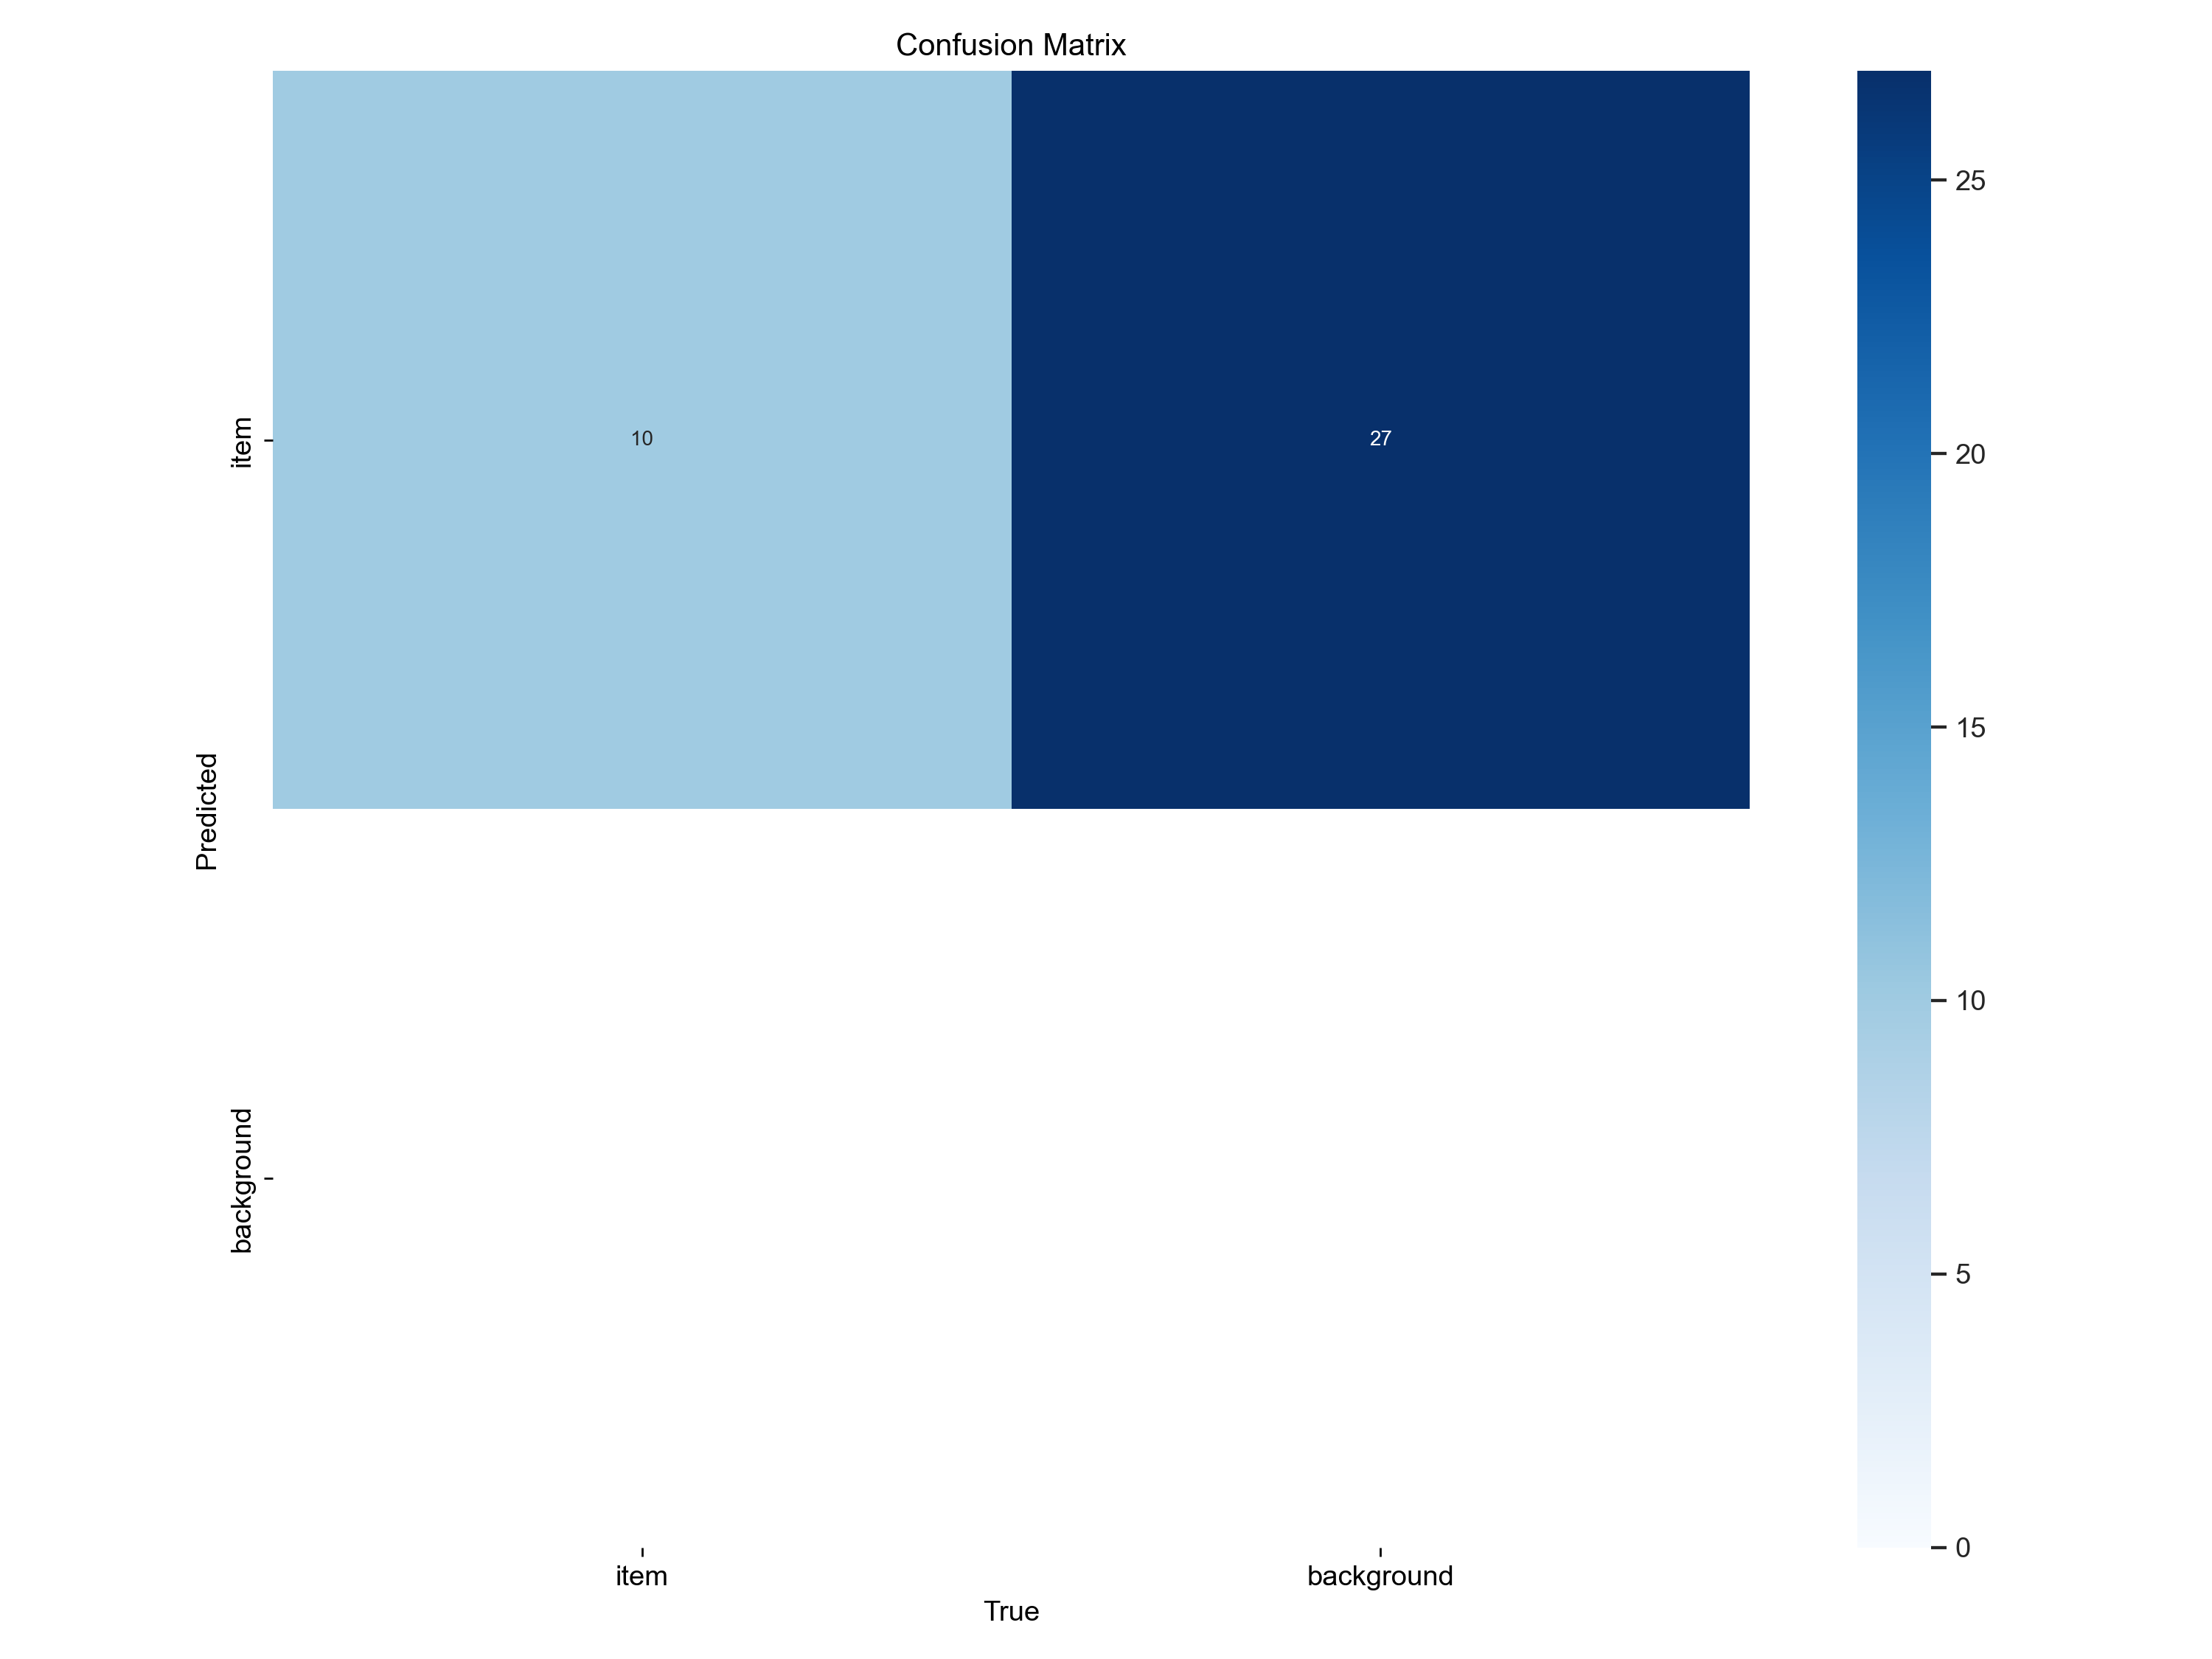

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/models/{project_name}/train/confusion_matrix.png', width=600)

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final


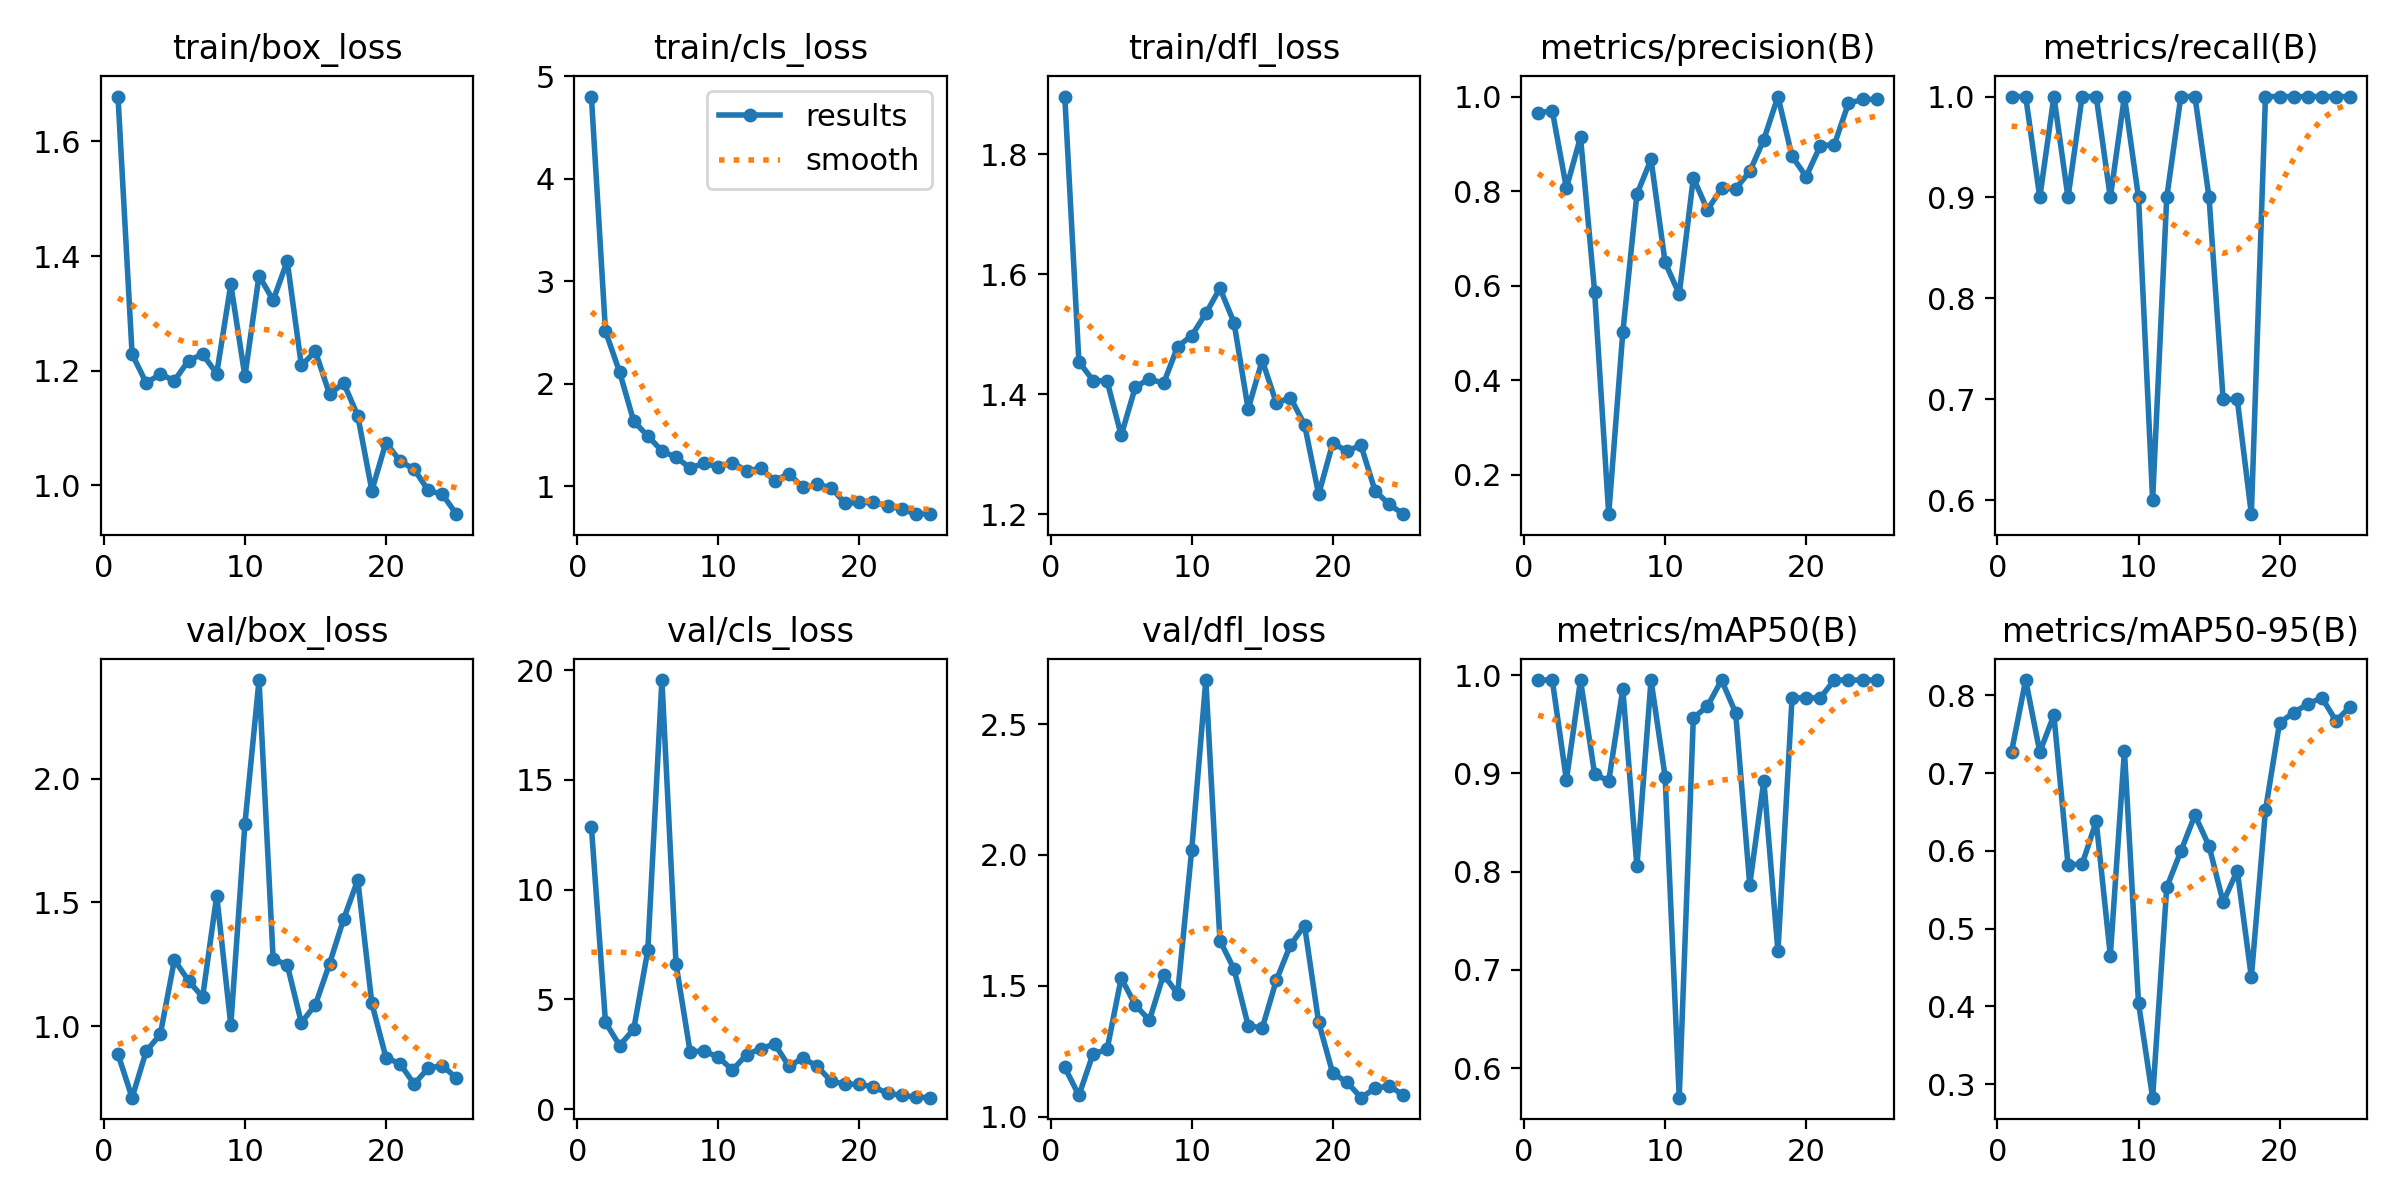

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/models/{project_name}/train2/results.png', width=600)

### Validate Custom Model

In [ ]:
%cd {HOME}

model = YOLO(f"models/{project_name}/train/weights/best.pt")
results = model.val(project=f"models/{project_name}", name="val", conf=0.25, iou=0.6, save=True)


/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.6.0 CPU (Apple M1 Max)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/valid/labels.cache... 15 images, 5 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                   all         15         10       0.97          1      0.995      0.826
Speed: 0.4ms preprocess, 82.2ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to models/yolov8s-bs-augmented-with-improved-dataset/val8


#### F1-score / Precision / Recall / Precision-Recall 

<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/val/F1_curve.png" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/val/P_curve.png" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/val/R_curve.png" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/val/PR_curve.png" alt="Alt text" width="500">

### Validation Labels/Predictions

<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/val/val_batch0_labels.jpg" alt="Alt text" width="500">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/val/val_batch0_pred.jpg" alt="Alt text" width="500">

### ROC - Curve

In [ ]:
import matplotlib.pyplot as plt

# Function to compute IoU
def compute_iou(box1, box2):
    """Compute IoU between two bounding boxes (x1, y1, x2, y2 format)."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area_box2 = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union = area_box1 + area_box2 - intersection
    return intersection / union if union > 0 else 0

# Load trained YOLO model
model = YOLO("/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/train/weights/best.pt")  # Change to your model file

# Paths to validation data
val_images = "/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/valid/images"  # Update with actual path
val_labels = "/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/valid/labels/"  # YOLO format label files

# Run inference
results = model.predict(val_images, conf=0.6, iou=0.6, max_det=1)

# IoU threshold for True Positives
IOU_THRESHOLD = 0.5

# Lists to store confidence scores and ground truth labels
confidences = []
ground_truths = []

# Process predictions
for result in results:
    pred_boxes = result.boxes.xyxy.cpu().numpy() if result.boxes else []  # Predicted bounding boxes
    pred_scores = result.boxes.conf.cpu().numpy() if result.boxes else []  # Confidence scores

    # Load corresponding ground truth
    image_name = result.path.split("/")[-1].replace(".jpg", ".txt")  # Adjust format if needed
    gt_file = val_labels + image_name

    # Check if label file exists and is not empty
    if os.path.exists(gt_file) and os.path.getsize(gt_file) > 0:
        gt_boxes = np.loadtxt(gt_file, usecols=[1, 2, 3, 4])
        if gt_boxes.ndim == 1:
            gt_boxes = np.expand_dims(gt_boxes, axis=0)
    else:
        gt_boxes = np.array([])  # No ground truth boxes (background image)

    img_w, img_h = result.orig_shape  # Get original image shape

    # Convert YOLO format (x_center, y_center, w, h) → (x1, y1, x2, y2)
    if gt_boxes.size > 0:
        gt_boxes = np.array([yolo_to_xyxy(box, img_w, img_h) for box in gt_boxes])

    # Case 1: No Detections & No Ground Truth → True Negative (TN)
    if len(pred_boxes) == 0 and len(gt_boxes) == 0:
        ground_truths.append(0)  # Background image (should be negative)
        confidences.append(0)  # No detections, so confidence is 0

    # Case 2: Model Predicts Object in a Background Image → False Positive (FP)
    elif len(pred_boxes) > 0 and len(gt_boxes) == 0:
        for score in pred_scores:
            ground_truths.append(0)  # Background image, so it's a False Positive
            confidences.append(score)  # Store prediction confidence

    # Case 3: Model Detects Object in an Image with Ground Truth
    elif len(gt_boxes) > 0:
        for i, score in enumerate(pred_scores):
            max_iou = 0  # Track highest IoU for this prediction
            for gt_box in gt_boxes:
                iou = compute_iou(pred_boxes[i], gt_box)
                max_iou = max(max_iou, iou)

            # If IoU ≥ threshold, it's a True Positive (TP); otherwise, it's a False Positive (FP)
            ground_truths.append(1 if max_iou >= IOU_THRESHOLD else 0)
            confidences.append(score)

# Compute ROC curve
fpr, tpr, _ = roc_curve(ground_truths, confidences)
roc_auc = auc(fpr, tpr)

print("FPR:", fpr)
print("TPR:", tpr)
print("ROC AUC Score:", roc_auc)

print("Total Positive Cases (Ground Truth 1s):", sum(ground_truths))
print("Total Negative Cases (Ground Truth 0s):", len(ground_truths) - sum(ground_truths))

# Plot ROC curve
plt.close('all')  # Close any previous figures
plt.figure(figsize=(8, 6))  # Create a new figure
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for YOLO Model")
plt.legend(loc="lower right")
plt.show(block=True)  # Force rendering



image 1/15 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/valid/images/0-02-02-232246c3eab8bdbd8f374af15949a454b85575776365ca7e0ffcd963edb98fe3_29dceffe57f_jpg.rf.07a2b1631d8c77eb3f1141020c1c2072.jpg: 640x640 (no detections), 72.9ms
image 2/15 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/valid/images/0-02-02-56c99b8b37d83fa3e1aec02d8199e7152a6711bc38460d4c3b261b6fd010a0ad_29dceffb67f_jpg.rf.1457d14eb6a580b1b2dfa38f423e27a6.jpg: 640x640 (no detections), 67.7ms
image 3/15 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/valid/images/0-02-02-6ac14489d47ff37560419dc5bae1825bf81ec9604b099a2759e4345fab796e8d_29dceff91c0_jpg.rf.02e83df86a7c0ca30804c59f2cf949b8.jpg: 640x640 (no detections), 64.7ms
image 4/15 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/valid/images/0-02-02-76b619e434294a257c9539cbacb1220d9306ff10c0e649d324df3f456d2d66e4_29dceffb7e3_jpg.rf.f

<Figure size 800x600 with 1 Axes>

### Inference (Testing)

In [49]:
%cd {HOME}
!yolo task=detect mode=predict model=models/{project_name}/train/weights/best.pt conf=0.7 source={dataset.location}/test/images project="models/{project_name}" name="test" save=True

/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.6.0 CPU (Apple M1 Max)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/8 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/test/images/0-02-02-020cab60d771c86739a7a22c83e7621b1bcceca2d2c0a4c9bad67215d20f36e0_29dcefe3f35_jpg.rf.9772f9d4a95ccaa9e201cc871406e344.jpg: 640x640 (no detections), 75.5ms
image 2/8 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/test/images/0-02-02-7ffff12291f5c576bd7d8ba5b84215474500d19007851c7f6272ca89570883ce_29dceffe568_jpg.rf.bafc9a80f32dfd94e43849e76fed4200.jpg: 640x640 1 item, 66.4ms
image 3/8 /Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/datasets/Banana-Slug-3/test/images/0-02-02-f8bdb8f58feb253c4e9499be98f564d051f3e4b46b1453a66ba176b6baea0009_29dceff45c2_jpg.rf.ffcb6594032ebf66af5d9948fd653042.jpg: 640x640 (no detections), 66.8ms
image 

#### Training Infererence Examples

<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/test/0-02-02-f8bdb8f58feb253c4e9499be98f564d051f3e4b46b1453a66ba176b6baea0009_29dceff45c2_jpg.rf.ffcb6594032ebf66af5d9948fd653042.jpg" alt="Alt text" width="300">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/test/viber_image_2025-03-12_20-58-44-988_jpg.rf.06fd2c12aad6a4a14087a73c3f1cf1de.jpg" alt="Alt text" width="300">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/test/viber_image_2025-03-12_20-58-45-296_jpg.rf.0bf8d7e8015c760eabde137258a81bcf.jpg" alt="Alt text" width="300">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/test/viber_image_2025-03-12_20-58-45-462_jpg.rf.628caa91e37dcde160fe1da49e40666c.jpg" alt="Alt text" width="300">
<img src="/Users/Mac_1/Documents/Development/1.Projects/CV/CV-Final/models/yolov8s-bs-augmented-with-improved-dataset/test/0-02-02-020cab60d771c86739a7a22c83e7621b1bcceca2d2c0a4c9bad67215d20f36e0_29dcefe3f35_jpg.rf.9772f9d4a95ccaa9e201cc871406e344.jpg" alt="Alt text" width="300">
